In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifyiny the correct structure, encoding and other details. The read_csv method reads csv files and accepts many parameters

In [8]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer

In [33]:
df = pd.read_csv('Coinbase_BTCUSD_dailydata.csv')
df['date'] = pd.to_datetime(df['date']) # changes date to a timestamp type

In [34]:
df.head() # pandas assumes the first line is a header

,unix,low,high,open,close,volume,date,vol_fiat
0,1671062400,17318.85,17856.26,17805.36,17404.26,33937.110732,2022-12-15,5.906503e+08
1,1670976000,17660.93,18385.36,17772.98,17804.97,49295.420721,2022-12-14,8.777035e+08
2,1670889600,17089.17,17999.99,17212.90,17773.18,38316.031725,2022-12-13,6.809977e+08
3,1670803200,16875.83,17244.63,17085.62,17211.66,20659.657092,2022-12-12,3.555870e+08
4,1670716800,17073.19,17271.92,17128.10,17085.21,9948.852670,2022-12-11,1.699782e+08


In [35]:
df.set_index('date', inplace=True) # sets the timestamp as the index

In [37]:
df

,unix,low,high,open,close,volume,vol_fiat
date,,,,,,,
2022-12-15,1671062400,17318.85,17856.26,17805.36,17404.26,33937.110732,5.906503e+08
2022-12-14,1670976000,17660.93,18385.36,17772.98,17804.97,49295.420721,8.777035e+08
2022-12-13,1670889600,17089.17,17999.99,17212.90,17773.18,38316.031725,6.809977e+08
2022-12-12,1670803200,16875.83,17244.63,17085.62,17211.66,20659.657092,3.555870e+08
2022-12-11,1670716800,17073.19,17271.92,17128.10,17085.21,9948.852670,1.699782e+08
...,...,...,...,...,...,...,...
2022-02-23,1645574400,37055.00,39276.85,38251.67,37268.19,15510.113300,5.780338e+08
2022-02-22,1645488000,36350.00,38469.06,37022.11,38251.48,22767.087720,8.708748e+08
2022-02-21,1645401600,36811.00,39506.91,38395.99,37023.00,20970.763787,7.764006e+08


In [47]:
df.shape

(300, 7)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2022-12-15 to 2022-02-19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   unix      300 non-null    int64  
 1   low       300 non-null    float64
 2   high      300 non-null    float64
 3   open      300 non-null    float64
 4   close     300 non-null    float64
 5   volume    300 non-null    float64
 6   vol_fiat  300 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 18.8 KB


In [49]:
df.info

<bound method DataFrame.info of                   unix       low      high      open     close        volume  \
date                                                                           
2022-12-15  1671062400  17318.85  17856.26  17805.36  17404.26  33937.110732   
2022-12-14  1670976000  17660.93  18385.36  17772.98  17804.97  49295.420721   
2022-12-13  1670889600  17089.17  17999.99  17212.90  17773.18  38316.031725   
2022-12-12  1670803200  16875.83  17244.63  17085.62  17211.66  20659.657092   
2022-12-11  1670716800  17073.19  17271.92  17128.10  17085.21   9948.852670   
...                ...       ...       ...       ...       ...           ...   
2022-02-23  1645574400  37055.00  39276.85  38251.67  37268.19  15510.113300   
2022-02-22  1645488000  36350.00  38469.06  37022.11  38251.48  22767.087720   
2022-02-21  1645401600  36811.00  39506.91  38395.99  37023.00  20970.763787   
2022-02-20  1645315200  38000.00  40146.07  40101.93  38389.03  10972.321757   
2022-02-

In [50]:
df.head() # gives top 5 rows, can (3) and will give you top 3

,unix,low,high,open,close,volume,vol_fiat
date,,,,,,,
2022-12-15,1671062400,17318.85,17856.26,17805.36,17404.26,33937.110732,5.906503e+08
2022-12-14,1670976000,17660.93,18385.36,17772.98,17804.97,49295.420721,8.777035e+08
2022-12-13,1670889600,17089.17,17999.99,17212.90,17773.18,38316.031725,6.809977e+08
2022-12-12,1670803200,16875.83,17244.63,17085.62,17211.66,20659.657092,3.555870e+08
2022-12-11,1670716800,17073.19,17271.92,17128.10,17085.21,9948.852670,1.699782e+08


In [51]:
df.tail(2)

,unix,low,high,open,close,volume,vol_fiat
date,,,,,,,
2022-02-20,1645315200,38000.0,40146.07,40101.93,38389.03,10972.321757,4.212168e+08
2022-02-19,1645228800,39655.0,40469.82,39993.64,40101.94,6277.302013,2.517320e+08


In [52]:
df.dtypes

unix          int64
low         float64
high        float64
open        float64
close       float64
volume      float64
vol_fiat    float64
dtype: object

In [53]:
df.head()

,unix,low,high,open,close,volume,vol_fiat
date,,,,,,,
2022-12-15,1671062400,17318.85,17856.26,17805.36,17404.26,33937.110732,5.906503e+08
2022-12-14,1670976000,17660.93,18385.36,17772.98,17804.97,49295.420721,8.777035e+08
2022-12-13,1670889600,17089.17,17999.99,17212.90,17773.18,38316.031725,6.809977e+08
2022-12-12,1670803200,16875.83,17244.63,17085.62,17211.66,20659.657092,3.555870e+08
2022-12-11,1670716800,17073.19,17271.92,17128.10,17085.21,9948.852670,1.699782e+08


In [54]:
df.dtypes

unix          int64
low         float64
high        float64
open        float64
close       float64
volume      float64
vol_fiat    float64
dtype: object

# How to put everything together

In [55]:
not_a_real_df_to_access = pd.read_csv(
     'csv_file_here.csv',
     header=None # or if one is already in place True, I think
     names=['Names', 'of', 'Columns'].
     index_col=0,
     parse_dates=True
     )

SyntaxError: invalid syntax (488437008.py, line 4)

 # Plotting Basics
 pandas integrates with Matplotlib. Creating a plot char is super simple

<AxesSubplot: xlabel='date'>

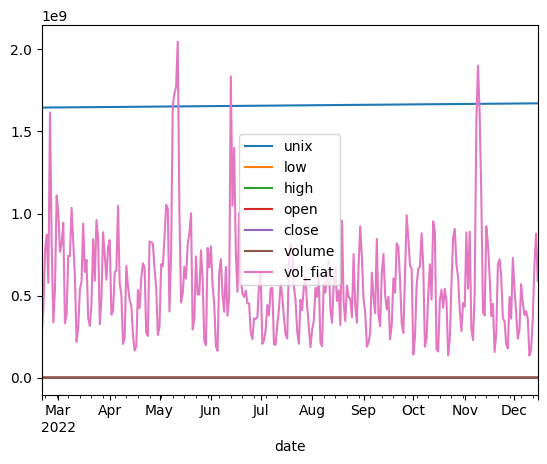

In [56]:
df.plot()

Behind the scenes, it's using matplotlib.pyplot's interface. We can create a similar plot with the plt.plot() function:

In [63]:
close.loc['2022-10-1':'2022-12-15].plot()

SyntaxError: EOL while scanning string literal (3002892703.py, line 1)